![alt text](FGV_logo.png)

# Sistemas de Recomendação


Referencias:
* [Slides Machine Learning Summer School 2014 @ CMU](https://www.slideshare.net/xamat/recommender-systems-machine-learning-summer-school-2014-cmu)
* [Video Machine Learning Summer School 2014 @ CMU](https://www.youtube.com/watch?v=bLhq63ygoU8&t=3207s)
<br>



In [1]:
import pandas as pd
import numpy as np

a = np.array((1,3))
b = np.array((4,4))

#### distancia euclideana

In [2]:
# a distancia euclideana será dada por:
np.sqrt((b[1] - a[1]) ** 2 + (b[0] - a[0]) ** 2)

3.1622776601683795

In [3]:
# alternativa
np.linalg.norm(a-b)

3.1622776601683795

#### similaridade cosseno

In [4]:
# primeiro, as normas de cada vetor
l_a = np.sqrt(a[0]**2 + a[1]**2)
l_b = np.sqrt(b[0]**2 + b[1]**2)
# a similaridade cosseno será dada por:
(a[0] * b[0] + a[1] * b[1])/(l_a * l_b)

0.89442719099991586

In [5]:
# alternativa 1
from scipy import spatial
1 - spatial.distance.cosine(a, b)

0.89442719099991586

In [6]:
# alternativa 2
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([a], [b])

array([[ 0.89442719]])

#### pearson's r
para verificar a similaridade entre colunas

In [7]:
a = np.array((1,3))
b = np.array((4,4))
c = np.array((4,7))

In [8]:
# primeiro as medias de cada dimensão
m_0 = (a[0] + b[0] + c[0])/3
m_1 = (a[1] + b[1] + c[1])/3

In [9]:
# removendo as medias de cada vetor
a_nm = a - (m_0, m_1) 
b_nm = b - (m_0, m_1) 
c_nm = c - (m_0, m_1)

In [10]:
l_x = np.sqrt(a_nm[0]**2 + b_nm[0]**2 + c_nm[0]**2)
l_y = np.sqrt(a_nm[1]**2 + b_nm[1]**2 + c_nm[1]**2)

In [11]:
(a_nm[0] * a_nm[1] + b_nm[0] * b_nm[1] + c_nm[0] * c_nm[1])/(l_x * l_y)

0.69337524528153649

In [12]:
pd.DataFrame([a, b, c]).corr()

,0,1
0,1.000000,0.693375
1,0.693375,1.000000


### Exemplo - Netflix

In [13]:
df = pd.DataFrame([[2, np.nan, 2, 4, 5, np.nan],
 [5, np.nan, 4, np.nan, np.nan, 1],
 [np.nan, np.nan, 5, np.nan, 2, np.nan],
 [np.nan, 1, np.nan, 5, np.nan, 4], 
 [np.nan, np.nan, 4, np.nan, np.nan, 2],
 [4, 5, np.nan, 1, np.nan, np.nan]])

In [14]:
df.columns = ['s', 'hc', 'a', 'ad', 'bb', 'wd']

In [15]:
df

,s,hc,a,ad,bb,wd
0,2.0,NaN,2.0,4.0,5.0,NaN
1,5.0,NaN,4.0,NaN,NaN,1.0
2,NaN,NaN,5.0,NaN,2.0,NaN
3,NaN,1.0,NaN,5.0,NaN,4.0
4,NaN,NaN,4.0,NaN,NaN,2.0
5,4.0,5.0,NaN,1.0,NaN,NaN


Ver as questões referentes a que conjunto de produtos utilizar no calculo de Pearson's r. 
https://grouplens.org/blog/similarity-functions-for-user-user-collaborative-filtering/ 

Na sequencia a seguir, vamos adotar os seguintes critérios:
* media (para remoção dos viéses) sobre todos os filmes avaliados, ou seja $I_i \cup I_k$
* no calculo de Pearson's r, tanto o numerador quanto denominador varrem somente as dimensões em comum, ou seja somente os filmes em $I_i \cap I_k$

In [17]:
# removendo a media por usuario para todas as dimensões existentes
# não levando em conta as interseções

# df_nm

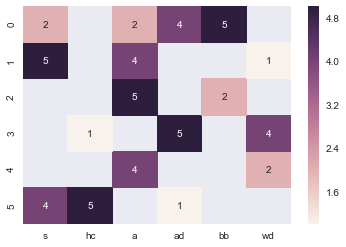

In [18]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df.round(0), annot = True)

### objetivo: Como o usuário 4 avaliaria os filmes não vistos?

#### 1o. passo: calcular similaridades entre usuario 4 e os outros

In [19]:
# similaridade de 1 com 4:

# medias para cada usuario
v_1 = (5 + 4 + 1)/3
v_4 = (4 + 2)/2
print('medias =',  v_1, v_4)

# normas L2 para cada usuario
n_1 = np.sqrt( (4 - v_1)**2 + (1 - v_1)**2 )
n_4 = np.sqrt( (4 - v_4)**2 + (2 - v_4)**2 )
print('normas =',  n_1, n_4)

u_14 = ((4 - v_1) * (4 - v_4) + (1 - v_1) * (2 - v_4)) / (n_1 * n_4)

print('\nsimilaridade =', u_14)

medias = 3.3333333333333335 3.0
normas = 2.42670329643 1.41421356237

similaridade = 0.874157276122


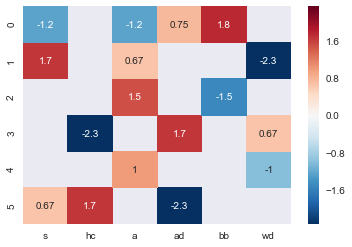

In [20]:
# podemos tirar a media de cada linha, para todo o dataframe
user_mean = df.mean(axis = 1)
df_nm = df.subtract(user_mean, axis = 0)
sns.heatmap(df_nm.round(2), annot = True)

In [21]:
# similaridade de 2 com 4
dim_comuns = (df_nm.iloc[2].notnull() & df_nm.iloc[4].notnull()).values

n_2 = np.sqrt((df_nm.iloc[2, dim_comuns] ** 2).sum())
n_4 = np.sqrt((df_nm.iloc[4, dim_comuns] ** 2).sum())

u_24 = np.dot(df_nm.iloc[2, dim_comuns], df_nm.iloc[4, dim_comuns]) / (n_2 * n_4) 
u_24

1.0

In [22]:
# similaridade de 3 com 4
dim_comuns = (df_nm.iloc[3].notnull() & df_nm.iloc[4].notnull()).values

n_3 = np.sqrt((df_nm.iloc[3, dim_comuns] ** 2).sum())
n_4 = np.sqrt((df_nm.iloc[4, dim_comuns] ** 2).sum())

u_34 = np.dot(df_nm.iloc[3, dim_comuns], df_nm.iloc[4, dim_comuns]) / (n_3 * n_4) 
u_34

-1.0

In [23]:
s_4 = [np.nan, u_14, u_24, u_34, 1.0, np.nan]
s_4

[nan, 0.8741572761215376, 1.0, -1.0, 1.0, nan]

#### 2o. passo: calcular a predição para usuário 4

In [24]:
# qual a media do usuario 4?
v_4 = df.mean(axis = 1)[4]
v_4

3.0

In [25]:
K = 0.35

In [26]:
# qual nota ele daria para 'Sherlock'?
v_4_s = v_4 + K * (df_nm['s'] * s_4).sum()
v_4_s

3.5099250777375635

In [27]:
# qual nota ele daria para 'House of Cards'?
v_4_hc = v_4 + K * (df_nm['hc'] * s_4).sum()
v_4_hc

3.8166666666666664

In [28]:
# qual nota ele daria para 'Arrested Development'?
v_4_ad = v_4 + K * (df_nm['ad'] * s_4).sum()
v_4_ad

2.416666666666667

In [29]:
# qual nota ele daria para 'Breaking Bad'?
v_4_bb = v_4 + K * (df_nm['bb'] * s_4).sum()
v_4_bb

2.4750000000000001

#### 3o. passo: em que ordem devemos recomendar para usuário 4?